In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [26]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Load the dataset using Pandas Libraries**

In [27]:
insurance_dataset=pd.read_csv('/kaggle/input/insurance/insurance.csv')

**Get the first five values of the dataset**

In [28]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

When we apply describe() to the DataFrame, we get the following statistics for each numerical column:

Count: The number of non-null (non-missing) values in the column.

Mean (Average): The arithmetic mean of the column's values.

Standard Deviation: A measure of how spread out the values are from the mean.

Minimum: The minimum value in the column.

25th Percentile (Q1): The value below which 25% of the data falls.

Median (50th Percentile or Q2): The middle value of the dataset (if sorted).

75th Percentile (Q3): The value below which 75% of the data falls.

Maximum: The maximum value in the column.

In [30]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Categorical Features
These are typically non-numeric columns that represent categories or labels.
* Smoker
* Sex
* Region

In [31]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The code uses the Seaborn library (`sns`) to create a histogram and a kernel density estimate plot (`distplot`) for the 'age' column in the 'insurance_dataset' DataFrame.
1. `sns.set()`: This line sets the default Seaborn visual style for the plots.
2. `plt.figure(figsize=(12,6))`: It creates a new Matplotlib figure with a specified size (12 inches in width and 6 inches in height).
3. `sns.distplot(insurance_dataset['age'])`: This line generates a distribution plot for the 'age' column, which includes a histogram of age values and a smooth curve representing the kernel density estimate.
4. `plt.title('Age Distribution')`: Sets the title of the plot to 'Age Distribution'.
5. `plt.show()`: Finally, this line displays the plot.

The resulting plot visually represents the distribution of ages in the 'insurance_dataset,' helping you understand the age distribution within the dataset.

/tmp/ipykernel_33/3893808765.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


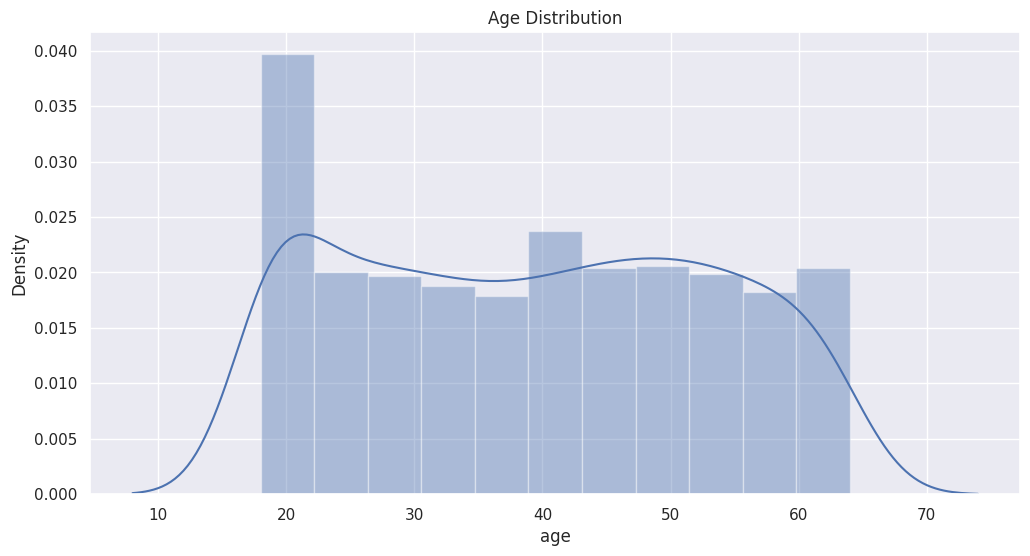

In [32]:
# Distribution of Age Value
sns.set()
plt.figure(figsize=(12,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

In [33]:
# Gender count
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

For counting Male and Female in the dataset

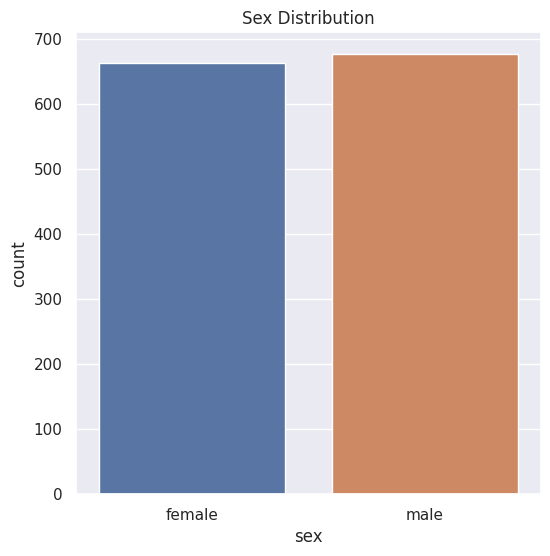

In [34]:
# Gender Column 
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

The distance plot generates a distribution plot for the 'bmi' column, which includes a histogram of bmi values and a smooth curve representing the kernel density estimate.

/tmp/ipykernel_33/1690622132.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


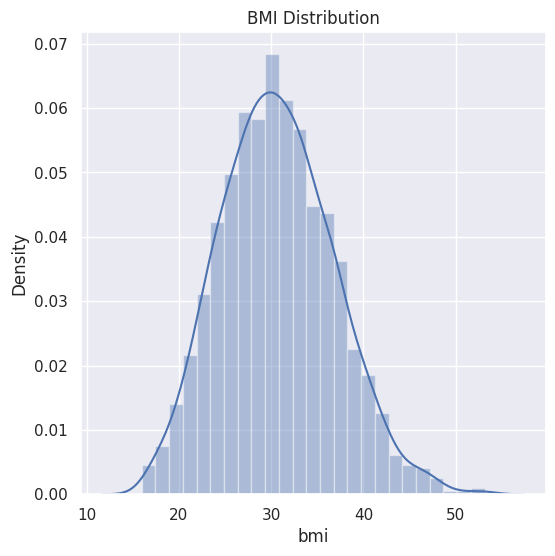

In [35]:
# BMI Distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

As we know the Normal BMI ranges from 18.5 to 24.6
So we observe that a lot of people from this dataset are over weight.

In [36]:
# children count 
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

Counting and showing the number of children with the help of a graph

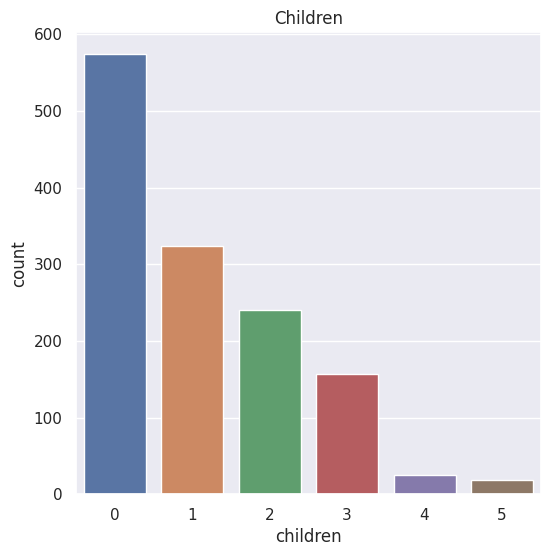

In [37]:
# children count distribution
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children')
plt.show()

In [38]:
# smoker counts 
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

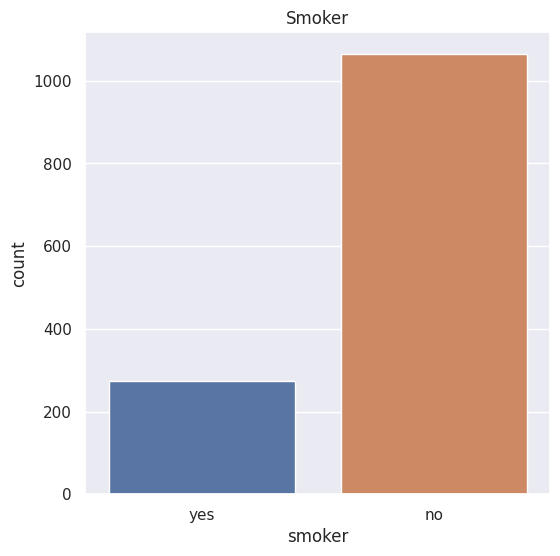

In [39]:
# smoker count distribution
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smoker')
plt.show()

In [40]:
# region counts 
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

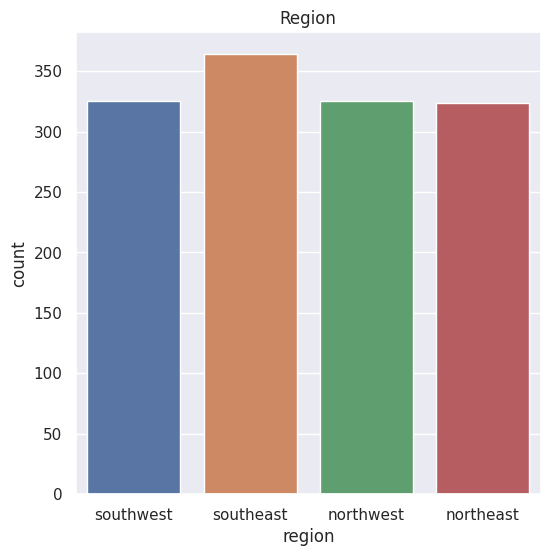

In [41]:
# region count distribution
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region')
plt.show()

Generates a distribution plot for the 'charges' column, which includes a histogram of charges values and a smooth curve representing the kernel density estimate.

/tmp/ipykernel_33/3556862532.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


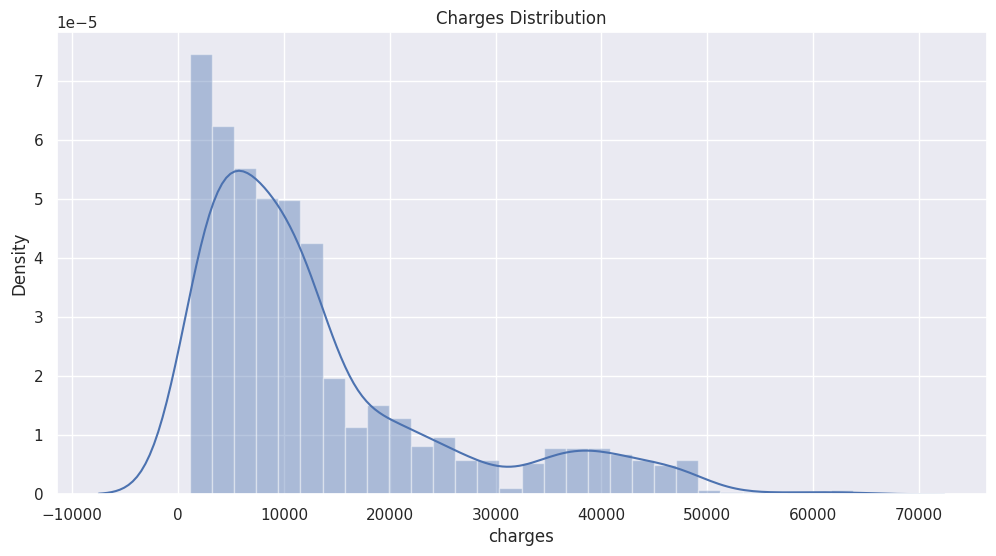

In [42]:
# Distribution of Charges Value
plt.figure(figsize=(12,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

### Data Preprocessing
Encoding the categorical features

In [45]:
# Encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
# Encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
# Encoding region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

Splitting features and target

In [46]:
X=insurance_dataset.drop(columns='charges',axis=1)
y=insurance_dataset['charges']

In [47]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [48]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


##### Splitting the data into Training and Testing Data

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into train and test sets
X = insurance_dataset.drop('charges', axis=1)
y = insurance_dataset['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 33685623.354144424
R-squared: 0.783021587162344


Cross-Validation


In [51]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = [np.sqrt(-score) for score in scores]

print("Cross-Validation RMSE Scores:", rmse_scores)

Cross-Validation RMSE Scores: [6335.966893880684, 5619.818317653346, 5998.269562744519, 6819.092107719696, 5927.457958763502]


Hyperparameter Tuning

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [54]:
best_model.fit(X_train, y_train)
y_final_pred = best_model.predict(X_test)

final_mse = mean_squared_error(y_test, y_final_pred)
final_r2 = r2_score(y_test, y_final_pred)

print("Final Model - Mean Squared Error:", final_mse)
print("Final Model - R-squared:", final_r2)


Final Model - Mean Squared Error: 19068370.100744028
Final Model - R-squared: 0.8771753564907263


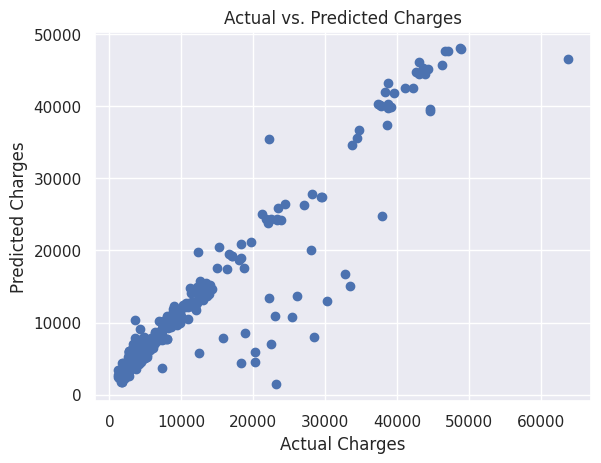

In [55]:
plt.scatter(y_test, y_final_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.show()

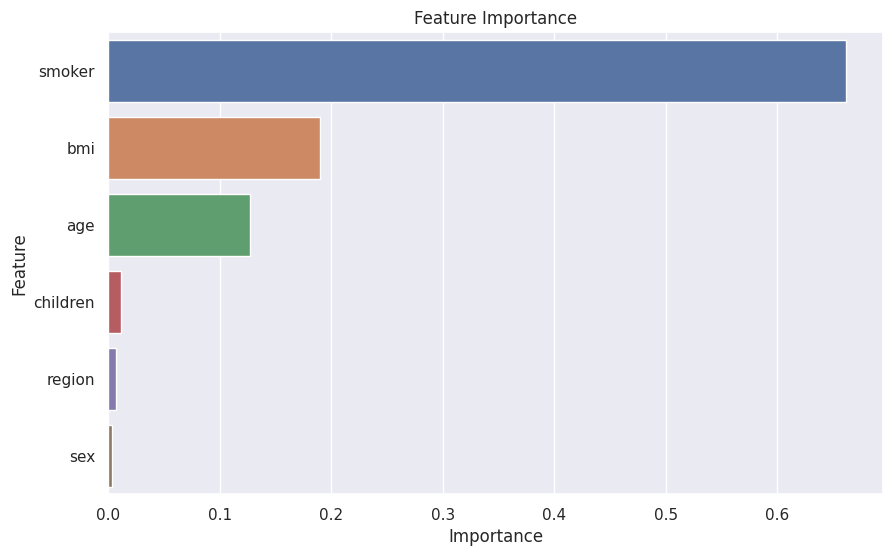

In [56]:
feature_importance = best_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()